### SMM284 Applied Machine Group Assignment - Group 9

## Introduction


In our analysis, we analysed a beer dataset consisting of up to 50 top-rated beers with a total of 5558. The project aims to provide insights to a potential beer market entrant to offer customers beers of the highest ratings. The dataset contains information on the beer supplied by BeerAdvocate.com including beer name, style, brewery, description provided by the company, ABV (Alcohol by Volume), average rating of the beer at the time of collection, the min and max IBU (International Bitterness Units scale). The dataset also contains the tasting profile of the beer describe using 11 characteristics including astringency, body, alcohol, bitter, sweet, sour, salty, fruits, hoppy, spices, and malty. These are collected by counting the words found in up to 25 customer reviews, assuming that customers provide reviews describing the beer based on their experience rather than not.

In order to analyse the tasting features mentioned in the beer description, we utilised another dataset containing keywords that describe the 11 characteristics of beer. We matched the description with the keywords and gave a number of 1 to the charactertics if the respective keywords are present, and a 0 if not present. 

We conducted NLP analysis, regression modelling, PCA and deep learning on the datasets to understand the different factors that would contribute to a high rated beer. 

In [2]:
# table showing our application of in-class materials to our beer dataset
import pandas as pd
table_of_content = pd.DataFrame([
                                ["Data cleansing & Exploratory Data Analysis (EDA)", "Conducted data cleaning and EDA for our beer dataset"], 
                                ["Machine learning concepts", "Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"],
                                ["NLP pipeline, Topic Modelling, Sentiment Analysis", "Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews"],
                                ["Neural networks and deep learning","Calculated loss functions, and carry out hyper-parameter tuning for deep learning"]
                                ],
                                columns=["Key concepts","Use of concepts in our analysis"])
pd.set_option('display.max_colwidth', None)
table_of_content

,Key concepts,Use of concepts in our analysis
0,Data cleansing & Exploratory Data Analysis (EDA),Conducted data cleaning and EDA for our beer dataset
1,Machine learning concepts,"Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"
2,"NLP pipeline, Topic Modelling, Sentiment Analysis",Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews
3,Neural networks and deep learning,"Calculated loss functions, and carry out hyper-parameter tuning for deep learning"


In [3]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split

In [4]:
# read data
data = pd.read_csv('beer_data_set.csv')

# Data Information

In [5]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [6]:
#check data shape and variables
print(data.shape)
data.head().T

(5558, 21)


,0,1,2,3,4
Name,Amber,Double Bag,Long Trail Ale,Doppelsticke,Scurry
key,251,252,253,254,255
Style,Altbier,Altbier,Altbier,Altbier,Altbier
Style Key,8,8,8,8,8
Brewery,Alaskan Brewing Co.,Long Trail Brewing Co.,Long Trail Brewing Co.,Uerige Obergärige Hausbrauerei,Off Color Brewing
Description,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t","Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t","Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",Notes:,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t"
ABV,5.3,7.2,5.0,8.5,5.3
Ave Rating,3.65,3.9,3.58,4.15,3.67
Min IBU,25,25,25,25,25
Max IBU,50,50,50,50,50


<AxesSubplot:>

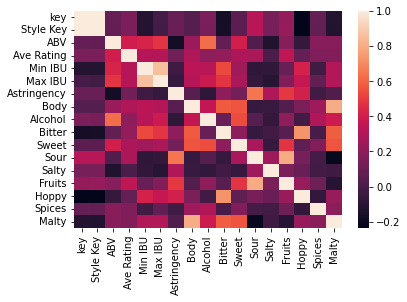

In [7]:
# inspect variables correlation
sns.heatmap(data.corr())

# there is no highly correlated variables in this dataset

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

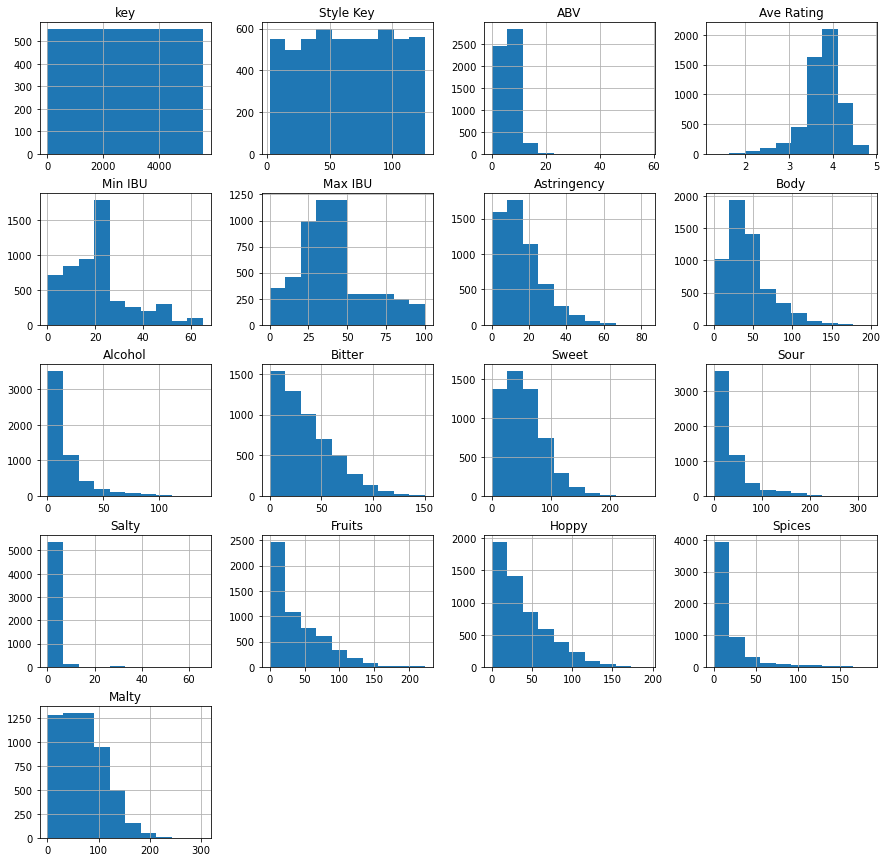

In [8]:
# inspect the distribution of the data
data.hist(figsize=(15,15))

# no outlier is spotted from the distribution graphs

In [9]:
# inspect unique values
print(data.nunique())

# there is no unique value in the dataset

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [10]:
# inspect na values
print(data.isna().any())

# there is missing value in the Name column
# the Key column is the unique id for name, therefore we drop the name column in the data pre-processing part

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [11]:
# inspect Brewery column
print(data['Brewery'].nunique()) #total number of brewers
data['Brewery'].unique() #name of the brewers

1498


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

In [12]:
# there are some rows that contain 'error entering this description' in their description, we need to drop it in the pre-processing section
data.loc[data['Description'] == 'error entering this description', :]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3166,Alpha King,2004,Pale Ale - American,48,3 Floyds Brewing Co.,error entering this description,6.66,4.26,25,50,...,25,6,45,37,41,1,46,78,6,55
5551,Winter Ale,694,Winter Warmer,17,Fremont Brewing Company,error entering this description,8.00,3.87,35,50,...,80,26,56,79,19,0,27,44,26,122


# Data pre-processing

In [13]:
# create dataframe to store name and key
name_key = data[["Name", "key"]].drop_duplicates().reset_index(drop=True)
# create dataframe to store style and key
style_key = data[["Style", "Style Key"]].drop_duplicates().reset_index(drop=True)
# create keys for brewery
brewery_key = pd.factorize(data['Brewery'], sort=True)[0]
data.insert(2, 'Brewery Key', brewery_key)
# create dataframe to store style and key
brewery_key = data[["Brewery", "Brewery Key"]].drop_duplicates().reset_index(drop=True)
# drop columns: Name, Style
df_beer = data.drop(['Name', 'Style', 'Brewery'], axis = 1)
df_beer.head(10)

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,1402,8,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,1019,8,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Notes:Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
6,257,1402,8,Notes:,6.0,4.10,25,50,22,45,13,46,62,25,1,34,60,4,103
7,258,1464,8,Notes:Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
8,259,1237,8,Notes:,5.0,3.60,25,50,18,49,5,37,73,22,0,21,37,4,98
9,260,1336,8,"Notes:OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97


In [14]:
# remove rows that contain only 'Notes:' in description - they are NA values

# 1. remove the 'Notes' in the description - so that rows that contain only 'Notes:' in description will become empty
df_beer['Description'] = df_beer['Description'].str.replace(r'Notes:', "", regex = True)
print(df_beer.shape)

# 2. create a new dataframe with rows that contain description with length greater than 0 (rows that have no empty description)
df_beer1 = df_beer[df_beer['Description'].str.split().str.len().gt(0)]
print(df_beer1.shape)

# When inspecting the dataset, there are some rows that contain description of 'error entering this description', these rows need to be removed as well
df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)

#check the shape of the new df if we have removed the empty description rows
print(df_beer1.shape)
df_beer1.head(10)

(5558, 19)
(3362, 19)
(3360, 19)


/var/folders/w3/c05dgb3x27z96j4wrkrgvn380000gn/T/ipykernel_30046/3773452109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,"Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
7,258,1464,8,Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
9,260,1336,8,"OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97
11,262,1402,8,"Uerige Alt is the most bittered beer in Germany. In spite of this (or just for that reason), this legendary Altbier from Düsseldorf is so full-bodied, aromatic and wholesome.Our top-fermented specialty has been brewed since 1862 from barley malt, caramel malt, roasted malt, hops, water - and with our very special Uerige yeast.Our Uerige Alt is regularly chosen among the ten best beers in Germany. It has an alcohol content of 4.7% and a minimum fresh date of eight weeks.Unser Uerige Alt wird regelmäßig unter die zehn besten Biere Deutschlands gewählt. Es hat einen Alkoholgehalt von 4,7% und ein Mindestfrischedatum von acht Wochen.\t",4.7,4.00,25,50,34,48,9,55,59,25,1,32,68,12,121
12,263,1481,8,"Check out a piece of Nashville brewing history! Gerst Brewery was the original Nashville brewery, but never recovered after prohibition. We are excited to partner w

In [15]:
# define a function for text cleaning 
def preprocess(text):

    # Remove special characters 
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # remove space 
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # remove all numbers
    text = re.sub(r'\d+','', text) 

    # remove \t
    text = re.sub(r'\t','', text) 

    # substitute multiple white spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove punctations 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)

    return text

In [16]:
#apply text preprocess function to the dataset
df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))
df_beer1

/var/folders/w3/c05dgb3x27z96j4wrkrgvn380000gn/T/ipykernel_30046/401488823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,26,48,104,27,1,43,29,27,96
5552,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,23,16,54,43,0,54,14,140,58
5554,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5556,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer though brewed without any spices Just all malt and hop goodness Light caramel and toasty nuttiness as well as hint of sweeter chocolate are roun

### Analyse tasting features

In [17]:
# create the vocab list from excel file
# read file
Mouthfeel = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Mouthfeel')
Taste = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Taste')
Flavor = pd.read_excel('Beer Descriptors Simplified.xlsx',sheet_name='Flavor And Aroma')

In [18]:
# Drop all impact columns
Mouthfeel = Mouthfeel.drop(['Impact','Impact.1','Impact.2'], axis = 1)
Taste = Taste.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)
Flavor = Flavor.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)

In [19]:
# combine three data frames into one
df_descriptors = pd.concat([Mouthfeel,Taste,Flavor], axis = 1)
df_descriptors

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,acetic,acacia,absinthe,ahtanum,acacia,acetic,caviar,berries,ahtanum,absinthe,amaranth
1,acid,acasia,agave,amarillo,acasia,acid,cracker,berry,amarillo,allspice,azrael
2,acidic,amaranth,alcohol,anjilanaka,apple,acidic,crackers,blabaer,apollo,anise,barley
3,acidified,amargor,alcoholic,apollo,apples,acidified,crackery,blackberries,azacca,aniseed,barleymalt
4,acidifying,big,alcoholized,ashtray,apricot,acidifying,salt,blackberry,bitter,annatto,barleys
...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oreos
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seedy
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toffe
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tofee


In [20]:
# match vocab list to the description by spacy matcher
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [22]:
# create a function to extract words as a list from the df_descriptors
def extract_word_list(df,column):
    word_list = []
    word_list = df[column].tolist()
    word_list= [x for x in word_list if str(x) != 'nan']
    return word_list


In [23]:
# apply the function to the dataset
Astringent = extract_word_list(df_descriptors,'Astringent')
Body = extract_word_list(df_descriptors,'Body')
Alcoholic = extract_word_list(df_descriptors,'Alcoholic')
Bitter = extract_word_list(df_descriptors,'Bitter')
Sweet = extract_word_list(df_descriptors,'Sweet')
Sour = extract_word_list(df_descriptors,'Sour')
Salty = extract_word_list(df_descriptors,'Salty')
Fruity = extract_word_list(df_descriptors,'Fruity')
Hoppy = extract_word_list(df_descriptors,'Hoppy')
Spices = extract_word_list(df_descriptors,'Spices')
Malty = extract_word_list(df_descriptors,'Malty')

In [24]:
# convert each phrase to phrase pattern
Astringent_pattern = [nlp(x) for x in Astringent]
Body_pattern = [nlp(x) for x in Body]
Alcoholic_pattern = [nlp(x) for x in Alcoholic]
Bitter_pattern = [nlp(x) for x in Bitter]
Sweet_pattern = [nlp(x) for x in Sweet]
Sour_pattern = [nlp(x) for x in Sour]
Salty_pattern = [nlp(x) for x in Salty]
Fruity_pattern = [nlp(x) for x in Fruity]
Hoppy_pattern = [nlp(x) for x in Hoppy]
Spices_pattern = [nlp(x) for x in Spices]
Malty_pattern = [nlp(x) for x in Malty]

In [25]:
# get description from the df_beer1 to create a Doc object
description = df_beer1['Description']

In [26]:
# match the description with each pattern and create a new dataframe with matched patterns
Astringent_brand = []
Body_brand = []
Alcoholic_brand = []
Bitter_brand = []
Sweet_brand = []
Sour_brand = []
Salty_brand = []
Fruity_brand = []
Hoppy_brand = []
Spices_brand = []
Malty_brand = []

for text in description:
    temp = nlp(text)
    matcher.add('Astringent', None, *Astringent_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Astringent_brand.append(1)
    else: Astringent_brand.append(0)
    
    matcher.remove('Astringent')
    matcher.add('Body', None, *Body_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Body_brand.append(1)
    else: Body_brand.append(0)

    matcher.remove('Body')
    matcher.add('Alcoholic', None, *Alcoholic_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Alcoholic_brand.append(1)
    else: Alcoholic_brand.append(0)

    matcher.remove('Alcoholic')
    matcher.add('Bitter', None, *Bitter_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Bitter_brand.append(1)
    else: Bitter_brand.append(0)

    matcher.remove('Bitter')
    matcher.add('Sweet', None, *Sweet_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sweet_brand.append(1)
    else: Sweet_brand.append(0)

    matcher.remove('Sweet')
    matcher.add('Sour', None, *Sour_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sour_brand.append(1)
    else: Sour_brand.append(0)

    matcher.remove('Sour')
    matcher.add('Salty', None, *Salty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Salty_brand.append(1)
    else: Salty_brand.append(0)

    matcher.remove('Salty')
    matcher.add('Fruity', None, *Fruity_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Fruity_brand.append(1)
    else: Fruity_brand.append(0)

    matcher.remove('Fruity')
    matcher.add('Hoppy', None, *Hoppy_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Hoppy_brand.append(1)
    else: Hoppy_brand.append(0)

    matcher.remove('Hoppy')
    matcher.add('Spices', None, *Spices_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Spices_brand.append(1)
    else: Spices_brand.append(0)

    matcher.remove('Spices')
    matcher.add('Malty', None, *Malty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Malty_brand.append(1)
    else: Malty_brand.append(0)    

    matcher.remove('Malty')

In [27]:
# create a dataframe with matched patterns
df_brand = pd.DataFrame({'Astringent':Astringent_brand,
                            'Body':Body_brand,
                            'Alcoholic':Alcoholic_brand,
                            'Bitter':Bitter_brand,
                            'Sweet':Sweet_brand,
                            'Sour':Sour_brand,
                            'Salty':Salty_brand,
                            'Fruity':Fruity_brand,
                            'Hoppy':Hoppy_brand,
                            'Spices':Spices_brand,
                            'Malty':Malty_brand})

In [28]:
df_brand

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,1,0,0,0,0,1
4,1,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3355,0,1,1,0,1,0,0,0,0,0,1
3356,0,0,1,0,0,0,0,0,0,1,1
3357,0,0,0,0,0,0,0,0,1,0,0
3358,0,1,1,1,1,0,0,0,1,1,1


In [29]:
# rename the columns
df_brand.columns = ['Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']

In [30]:
# merge dataframe with df_beer1 and add prefix 'description_' to each column
df_beer1 = df_beer1.reset_index(drop=True)
df_clean = pd.merge(df_beer1,df_brand,left_index=True,right_index=True,how='left',suffixes=('_customer','_description'))
df_clean

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,Body_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,...,0,0,1,0,0,0,0,1,0,1
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,...,1,1,0,0,0,0,0,0,0,1
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,...,1,0,0,0,0,0,0,0,0,0
3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,...,0,1,1,1,1,0,0,0,0,1
4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,...,1,1,0,1,0,0,0,0,0,1
3356,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,...,0,1,0,0,0,0,0,0,1,1
3357,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,...,0,0,0,0,0,0,0,1,0,0
3358,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer thoug

In [31]:
# export to a csv file
df_clean.to_csv('df_clean.csv')

## NLP Analysis

### a. Compare customer reviews vs offical description 

In [32]:
# load the clean data for nlp
data_nlp = pd.read_csv('df_clean.csv')
data_nlp.head()

,Unnamed: 0,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,...,0,0,1,0,0,0,0,1,0,1
1,1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,...,1,1,0,0,0,0,0,0,0,1
2,2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,...,1,0,0,0,0,0,0,0,0,0
3,3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,...,0,1,1,1,1,0,0,0,0,1
4,4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,...,0,1,1,0,1,0,0,1,0,1


In [33]:
# compare customer reviews and business description
'''
Logic:
scale the customer reviews to the range of 0 to 1
using the formula:
similarity_score = Sum(|business_description_each_feature_score - customer_review_each_feature_score|)
The lower the score, the more similar the business description and customer review.
'''

'\nLogic:\nscale the customer reviews to the range of 0 to 1\nusing the formula:\nsimilarity_score = Sum(|business_description_each_feature_score - customer_review_each_feature_score|)\nThe lower the score, the more similar the business description and customer review.\n'

In [34]:
# scale the customer reviews by row to the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_customer = data_nlp[['Astringency_customer','Body_customer','Alcohol_customer',
'Bitter_customer','Sweet_customer','Sour_customer','Salty_customer','Fruits_customer',
'Hoppy_customer','Spices_customer','Malty_customer']]
data_customer = pd.DataFrame((scaler.fit_transform(data_customer.T)).T,columns=data_customer.columns)
# rename the columns
data_customer.columns = ['Astringency_scaled','Body_scaled','Alcohol_scaled','Bitter_scaled','Sweet_scaled','Sour_scaled','Salty_scaled','Fruits_scaled','Hoppy_scaled','Spices_scaled','Malty_scaled']
data_customer

,Astringency_scaled,Body_scaled,Alcohol_scaled,Bitter_scaled,Sweet_scaled,Sour_scaled,Salty_scaled,Fruits_scaled,Hoppy_scaled,Spices_scaled,Malty_scaled
0,0.117117,0.288288,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.000000
1,0.142857,0.678571,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.000000
2,0.225806,0.596774,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.000000
3,0.096330,0.316514,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.000000
4,0.255319,0.531915,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
3355,0.077670,0.689320,0.242718,0.456311,1.000000,0.252427,0.0,0.407767,0.271845,0.252427,0.922330
3356,0.107143,0.221429,0.164286,0.114286,0.385714,0.307143,0.0,0.385714,0.100000,1.000000,0.414286
3357,0.211538,0.701923,0.086538,0.557692,0.836538,0.221154,0.0,0.461538,0.875000,0.423077,1.000000
3358,0.039062,0.492188,0.226562,0.437500,0.601562,0.109375,0.0,0.210938,0.437500,0.171875,1.000000


In [35]:
# combine the dataframe with the customer reviews
data_nlp = pd.concat([data_nlp,data_customer],axis=1)
# drop the columns with the customer reviews
data_nlp = data_nlp.drop(['Astringency_customer','Body_customer','Alcohol_customer',
'Bitter_customer','Sweet_customer','Sour_customer','Salty_customer','Fruits_customer',
'Hoppy_customer','Spices_customer','Malty_customer'],axis=1)
data_nlp.head()

,Unnamed: 0,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_description,...,Body_scaled,Alcohol_scaled,Bitter_scaled,Sweet_scaled,Sour_scaled,Salty_scaled,Fruits_scaled,Hoppy_scaled,Spices_scaled,Malty_scaled
0,0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,0,...,0.288288,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.0
1,1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,0,...,0.678571,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.0
2,2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,1,...,0.596774,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.0
3,3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,1,...,0.316514,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.0
4,4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,1,...,0.531915,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.0


In [36]:
# drop the columns with the business description, ABV and IBU
data_simi= data_nlp.drop(['Unnamed: 0','Description','ABV','Min IBU','Max IBU'],axis=1)
data_simi.head()

,key,Brewery Key,Style Key,Ave Rating,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,...,Body_scaled,Alcohol_scaled,Bitter_scaled,Sweet_scaled,Sour_scaled,Salty_scaled,Fruits_scaled,Hoppy_scaled,Spices_scaled,Malty_scaled
0,251,34,8,3.65,0,0,0,1,0,0,...,0.288288,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.0
1,252,872,8,3.90,0,1,1,0,0,0,...,0.678571,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.0
2,253,872,8,3.58,1,1,0,0,0,0,...,0.596774,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.0
3,255,1019,8,3.67,1,0,1,1,1,1,...,0.316514,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.0
4,256,997,8,3.78,1,0,1,1,0,1,...,0.531915,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.0


In [37]:
# calculate the similarity score
data_simi['similarity_score'] = 0
temp = 0
for i in range(len(data_nlp)):
    sum = 0
    for j in range(4,15):
        temp = data_simi.iloc[i,j] - data_simi.iloc[i,j+11]
        temp=abs(temp)
        sum +=temp
    data_simi['similarity_score'][i] = sum

data_simi.head()

/var/folders/w3/c05dgb3x27z96j4wrkrgvn380000gn/T/ipykernel_30046/232010013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_simi['similarity_score'][i] = sum


,key,Brewery Key,Style Key,Ave Rating,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,...,Alcohol_scaled,Bitter_scaled,Sweet_scaled,Sour_scaled,Salty_scaled,Fruits_scaled,Hoppy_scaled,Spices_scaled,Malty_scaled,similarity_score
0,251,34,8,3.65,0,0,0,1,0,0,...,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.0,2.882883
1,252,872,8,3.90,0,1,1,0,0,0,...,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.0,3.333333
2,253,872,8,3.58,1,1,0,0,0,0,...,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.0,4.919355
3,255,1019,8,3.67,1,0,1,1,1,1,...,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.0,4.591743
4,256,997,8,3.78,1,0,1,1,0,1,...,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.0,4.712766


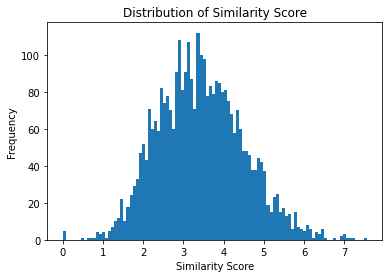

In [38]:
# plot the distribution of similarity score
import matplotlib.pyplot as plt
plt.hist(data_simi['similarity_score'], bins=100)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Score')
plt.show()

The similarity score is calculated by the formula: Sum(|business_description_each_feature_score - customer_review_each_feature_score|). The customer reviews are scaled from 0 to 1; the higher the score, the more recognised the feature by customers. The similarity score measures how far the business description is from customer reviews. The distribution figure represents that most beers' similarity scores are close to 3-4, and the overall distribution is a normal distribution with two thin tails on both sides. It indicates that for most beers, the business description is not that similar to how customers mentioned its flavour. However, there are only a few beers whose description differs from customer reviews and vice versa.

### b. Hypothesis: review similar to description = higher score 

In [39]:
'''
Hypothesis: if the description is similar to customer review, the higher the rating
'''

# linear regression for the similarity score and rating
from sklearn.linear_model import LinearRegression
X = data_simi[['similarity_score']]
y = data_simi['Ave Rating']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0005022149290898614

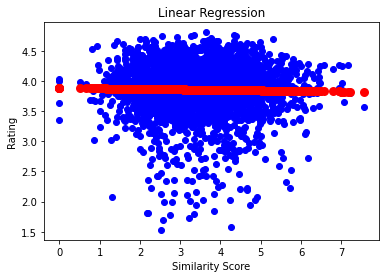

In [40]:
# plot the linear regression
plt.scatter(X, y, color='blue')
plt.scatter(X, reg.predict(X), color='red', linewidth=3)
plt.xlabel('Similarity Score')
plt.ylabel('Rating')
plt.title('Linear Regression')
plt.show()

The plot shows that the similarity between description and rating is not statistically related. The coef score is only 0.0005, and the predicted value (red line in the graph) is approximately a flat line, which indicates no matter the similarity score changes, the rating will keep the same. 

### c. Hypothesis: length of description would affect score

In [41]:
# get the length for each description
data_nlp['length'] = data_nlp['Description'].apply(len)
df_len = data_nlp[['length','Ave Rating']]
df_len.head()

,length,Ave Rating
0,139,3.65
1,642,3.90
2,380,3.58
3,312,3.67
4,512,3.78


In [42]:
'''
Hypothesis: length of the description is a good indicator of the rating
'''

# linear regression for the similarity score and rating
from sklearn.linear_model import LinearRegression
X = data_nlp[['length']]
y = data_nlp['Ave Rating']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0094007987475625

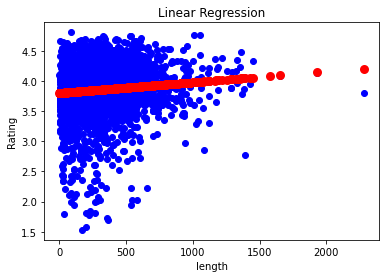

In [43]:
# plot the linear regression
plt.scatter(X, y, color='blue')
plt.scatter(X, reg.predict(X), color='red', linewidth=3)
plt.xlabel('length')
plt.ylabel('Rating')
plt.title('Linear Regression')
plt.show()

Compared to the similarity-rating graph, the length-rating plot demonstrates that length might be more relevant to the rating than the similarity score, for a rising trend can observe in the predicted value (red line). However, the R square score = 0.009, which means statistically, the review length cannot have a huge influence on how customers rate the beer.

### d. Hypothesis: sentiment analysis - see whether the tone would affect the score 

In [44]:
# to carry out sentiment analysis
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/crystal_wong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
# create a function to calculate the sentiment score
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_score(text):
    score = sent_analyzer.polarity_scores(text)
    return score['compound']

# add the sentiment score to the dataframe
data_nlp['sentiment_score'] = data_nlp['Description'].apply(sentiment_score)
data_nlp.head()

,Unnamed: 0,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_description,...,Bitter_scaled,Sweet_scaled,Sour_scaled,Salty_scaled,Fruits_scaled,Hoppy_scaled,Spices_scaled,Malty_scaled,length,sentiment_score
0,0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,0,...,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.0,139,0.8567
1,1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,0,...,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.0,642,0.9796
2,2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,1,...,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.0,380,0.9565
3,3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,1,...,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.0,312,0.7515
4,4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,1,...,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.0,512,0.3079


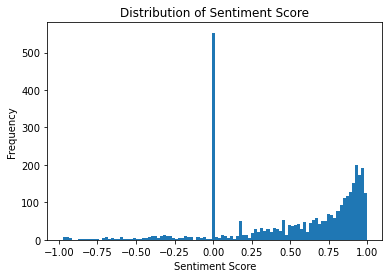

In [46]:
# plot the distribution of sentiment score
plt.hist(data_nlp['sentiment_score'], bins=100)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Score')
plt.show()

Sentiment analysis is applied to the business description of each beer. The distribution of sentiment score is plotted. It is evident from the graph that most descriptions are neutral and tend to be more positive. It is surprising to find that some descriptions have negative emotions.

In [47]:
# linear regression for the sentiment score and rating
X = data_nlp[['sentiment_score']]
y = data_nlp['Ave Rating']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.0010441886563692382

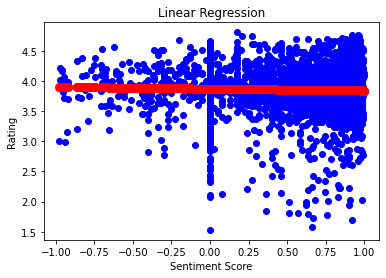

In [48]:
# plot the linear regression
plt.scatter(X, y, color='blue')
plt.scatter(X, reg.predict(X), color='red', linewidth=3)
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.title('Linear Regression')
plt.show()

Compared to the similarity score - rating graph and description length - rating graph, the R square sentiment rating score is higher (R square = 0.001). However, the value is still statistically low and demonstrates that the description's sentiment won't impact a lot on customers' ratings. However, most reviews are neutral; a further study in a dataset containing only positive and negative descriptions might improve the result.

In [49]:
# combine similarity score to data_nlp
data_nlp['similarity_score'] = data_simi[['similarity_score']]
# create a new dataset contrains rating, similarity_score, sentiment_score, and length
data_nlp_new = data_nlp[['Ave Rating','similarity_score','sentiment_score','length']]
data_nlp_new.head()


,Ave Rating,similarity_score,sentiment_score,length
0,3.65,2.882883,0.8567,139
1,3.90,3.333333,0.9796,642
2,3.58,4.919355,0.9565,380
3,3.67,4.591743,0.7515,312
4,3.78,4.712766,0.3079,512


In [50]:
#import library
import statsmodels.api as sm

In [51]:
#build regression model
X = data_nlp_new[['similarity_score','sentiment_score','length']]
Y = data_nlp_new['Ave Rating']
X = sm.add_constant(X)
lm = sm.OLS(Y,X.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ave Rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     20.51
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           3.64e-13
Time:                        14:48:12   Log-Likelihood:                -1703.2
No. Observations:                3360   AIC:                             3414.
Df Residuals:                    3356   BIC:                             3439.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.8773      0.025    153.182      0.000       3.828       3.927
similarity_score    -0.0162      0.007     -2.447      0.014      -0.029      -0.003
sentiment_score     -0.0894      0.018     -5.005      0.000      -0.124      -0.054
length               0.0003   3.52e-05      7.497      0.000       0.000       0.000
==============================================================================
Omnibus:                      934.676   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3546.229
Skew:                          -1.335   Prob(JB):                         0.00
Kurtosis:                       7.266   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we process all three features in the multi-linear regression model, we can see that sentiment score and length are statistically related to rating (p<.05), while similarity score is irrelevant. The coefficient of sentiment score is negative, which indicates that the more positive the description, the worse the rating, which needs more datasets (mentioned in the sentiment section) for further study. The coefficient of length is positive, indicating the longer the description, the higher the rating. However, the relatively low score demonstrates that it cannot influence the rating much. The overall R square is only 0.018, which means the features that determine beer ratings are underlying the const. 

##### Business Insights from NLP analysis

The NLP analysis indicates that the beer's business description will not significantly impact ratings. Customers' ratings focused more on the beers' quality and taste but rarely put attention on the description. However, it does not mean companies should not write a good business description. Other datasets related to description, such as the same beer's different descriptions, or description's vocabulary list, need to be studied to help brewers write better descriptions.

# Supervised Learning: Regression Modelling

In [52]:
# read file
df_clean = pd.read_csv("df_clean.csv",index_col=0)

In [53]:
# make a copy
df_new = df_clean.copy()
df_new.shape

(3360, 30)

In [54]:
# feature engineering - calculate average IBU by using (Max IBU - Min IBU)/2 to simplify the data
df_new["Ave IBU"] = (df_new["Min IBU"] + df_new["Max IBU"])/2

#drop unused columns
df_new = df_new.drop(['Min IBU', 'Max IBU', 'key', 'Description', 'Style Key', 'Brewery Key'], axis = 1, inplace=False)
df_new.shape

(3360, 25)

In [55]:
# split the data into 30% testing and 70% training
train_set, test_set = train_test_split(df_new, test_size=0.3, random_state=42)
print(train_set.shape)
print(test_set.shape)

(2352, 25)
(1008, 25)


In [56]:
# separate the dependent and independent variables
x_train = train_set.drop(["Ave Rating"], axis = 1)
y_train = train_set[["Ave Rating"]]

x_test = test_set.drop(["Ave Rating"], axis = 1)
y_test = test_set[["Ave Rating"]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 24)
(1008, 24)
(2352, 1)
(1008, 1)


In [57]:
# scale the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# step 1: we scale tasting profile by row and create a new dataframe 
# the characteristics in the tasting profile are retrived from different number of reviews, therefore they have to be on the same scale first 
scaled_customer = pd.DataFrame(scaler.fit_transform(x_train.iloc[:,1:12].T).T,columns=x_train.iloc[:,1:12].columns) 

# step 2: drop unscaled tasting profile and create another new dataframe  
x_drop = x_train.drop(x_train.iloc[:,1:12],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews from the two new dataframes
x_train_scaled = pd.concat([x_drop,scaled_customer],axis=1)

# step 4: scale the numerical values of the whole dataframe (excluding categorical variable)
x_train_scaled.iloc[:,[0,12, 13,14,15,16,17,18,19,20,21,22,23]]= scaler.fit_transform(x_train_scaled.iloc[:,[0,12, 13,14,15,16,17,18,19,20,21,22,23]]) 
x_train_scaled.head()

,ABV,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,...,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,-0.342162,0,1,0,1,1,0,0,0,0,...,2.800877,-0.171683,0.436641,-0.023014,-0.592885,0.795650,-1.106751,-0.496241,-0.356736,0.420017
1,-0.668782,0,0,0,0,0,0,0,0,0,...,0.756488,-1.260983,-0.082427,-0.870014,-0.295936,-0.365574,-0.281837,0.380671,-0.726914,1.072932
2,-0.954574,1,0,1,0,0,1,0,1,1,...,-0.937596,-0.076483,-1.229199,-0.869481,2.066340,1.201840,1.736132,-0.550202,-0.347399,-1.483306
3,1.086798,0,0,0,0,0,0,0,0,0,...,1.853429,0.588101,0.341595,0.169933,-0.805169,0.560868,-0.970655,-0.992568,-0.061188,0.948939
4,-0.138025,0,1,0,0,0,0,0,0,0,...,0.377937,-0.084550,-0.951876,-0.103685,-0.675925,0.677705,-0.510356,-0.913541,3.847466,-0.673335


In [58]:
# scale the testing data
# step 1: we scale tasting profile by row and create a new dataframe 
# the characteristics in the tasting profile are retrived from different number of reviews, therefore they have to be on the same scale first 
scaled_customer_test = pd.DataFrame(scaler.fit_transform(x_test.iloc[:,1:12].T).T,columns=x_test.iloc[:,1:12].columns) 

# step 2: drop unscaled reviews and create a new dataframe
x_drop_test = x_test.drop(x_test.iloc[:,1:12],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews from the two new dataframes
x_test_scaled = pd.concat([x_drop_test,scaled_customer_test],axis=1)

# step 4: scale the numerical values of the whole dataframe (excluding categorical variable)
x_test_scaled.iloc[:,[0,12, 13,14,15,16,17,18,19,20,21,22,23]] = scaler.fit_transform(x_test_scaled.iloc[:,[0,12, 13,14,15,16,17,18,19,20,21,22,23]]) 
x_test_scaled.head()

,ABV,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,...,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,-0.686938,1,1,0,1,0,0,0,0,1,...,-0.504882,-1.120027,-0.038642,0.521146,-0.658531,-0.480610,-0.151850,0.423399,-0.444259,1.003943
1,-0.403037,0,0,1,0,1,1,0,1,0,...,-1.109523,-0.047896,-1.261251,0.218514,2.339444,1.310480,0.807579,-0.982549,-0.251877,-1.678795
2,-0.281366,1,1,0,1,0,0,0,0,1,...,-0.023239,-0.830010,1.674481,-1.627466,-0.589951,0.276510,-0.525888,2.206556,-0.478332,-0.806335
3,-0.200251,0,1,0,1,0,0,0,0,0,...,1.232379,-0.115745,1.245797,-1.380601,-0.760203,0.549125,-1.332784,-1.357830,1.442452,0.905268
4,-1.214181,1,0,0,1,0,0,0,0,1,...,-0.403689,-1.213217,0.457624,-1.090676,0.589389,-0.801136,0.431324,1.085190,-1.223305,0.261728


In [59]:
# build linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# set up and fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# check the accuracy of our model with 10 fold cross-validation
lin_scores = cross_val_score(lr, x_test_scaled, y_test,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(lin_rmse_scores)

Scores:  [0.29838549 0.33610613 0.31265403 0.31380656 0.35274098 0.37364043
 0.35972223 0.30569724 0.31130752 0.28615161]
Mean:  0.32502122293968505
Standard deviation:  0.02742217076050376


In [60]:
# Build Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# set up and fit the model
dt = DecisionTreeRegressor()
decision_tree = dt.fit(x_train_scaled, y_train)

# test accuracy using 10-fold cross-validation scores 
dt_scores = cross_val_score(dt, x_test_scaled, y_test,
                           scoring="neg_mean_squared_error", cv=10)
dt_scores_rmse = np.sqrt(-dt_scores)
display_scores(dt_scores_rmse)

Scores:  [0.41460467 0.39679658 0.38019016 0.35770999 0.47195087 0.39908807
 0.46542113 0.3789655  0.40884349 0.2944826 ]
Mean:  0.3968053051955871
Standard deviation:  0.04838867253834484


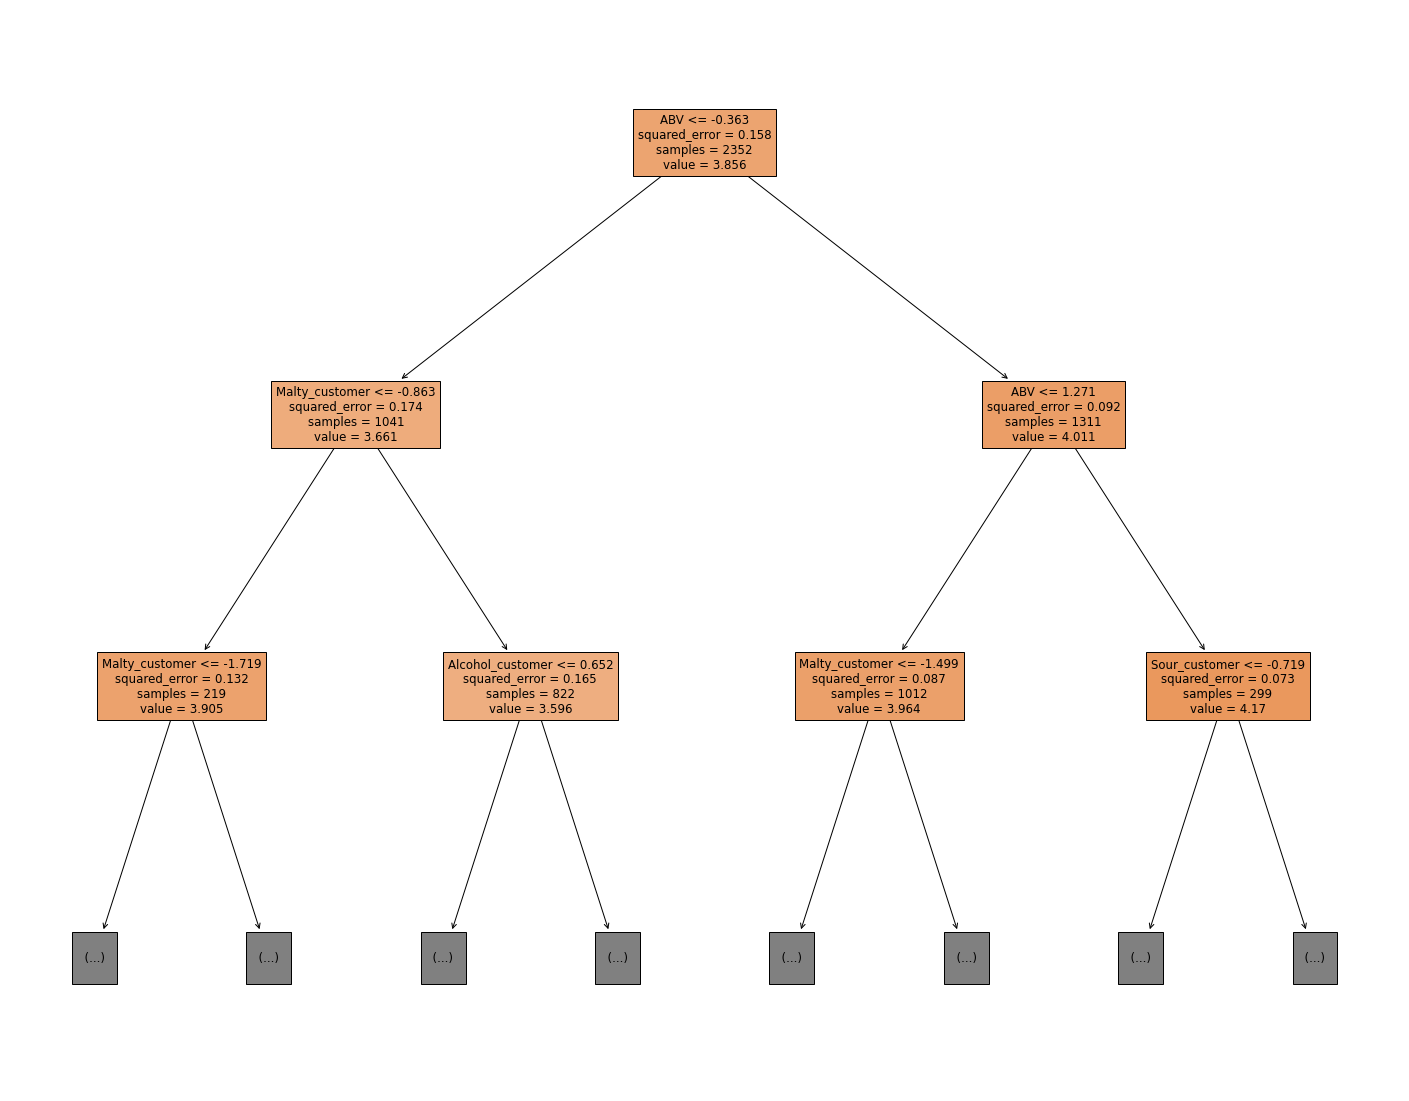

In [61]:
#visualise the decision tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
#get a list of attributes
attributes = list(x_train_scaled)
#the original tree is too large, therefore we limit the depth of the tree to 2
tree_viz= tree.plot_tree(dt, feature_names=attributes, filled=True, max_depth = 2)

In [62]:
# Build Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# set up and fit the model
forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)

# test accuracy using 10-fold cross-validation scores
forest_scores_cv = cross_val_score(forest, x_test_scaled, y_test,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_cv = np.sqrt(-forest_scores_cv)
display_scores(forest_rmse_cv)

/var/folders/w3/c05dgb3x27z96j4wrkrgvn380000gn/T/ipykernel_30046/1507530450.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_scaled, y_train)
/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/m

Scores:  [0.28079075 0.3254283  0.28432217 0.23537494 0.29985042 0.31954668
 0.3254662  0.29889145 0.236829   0.24060793]
Mean:  0.2847107845164097
Standard deviation:  0.034132139351119854


In [64]:
# results comparasion of the 3 models
#create data
data_models = [["Linear Regression", lin_rmse_scores.mean()], 
        ["Decision Tree Regressor", dt_scores_rmse.mean()], 
        ["Random Forest Regressor ", forest_rmse_cv.mean()]]
        
#define header names
col_names = ["Model", "rmse"]

#display table
from tabulate import tabulate
print(tabulate(data_models, headers=col_names))

Model                        rmse
-----------------------  --------
Linear Regression        0.325021
Decision Tree Regressor  0.396805
Random Forest Regressor  0.284711


In [65]:
#calculate the range of the dependent variable to compare it with the rmse score
range_rating = df_clean['Ave Rating'].max() - df_clean['Ave Rating'].min()
print('range of Ave Rating: ', range_rating)

range of Ave Rating:  3.2799999999999994


We built 3 regression models - Linear Regression, Decision Tree Regressor, and Random Forest Regressor, to understand the relationship between the average ratings and the features of the beers. The random forest regressor displayed the lowest root mean squared error (rmse) which indicates this model has the best fit to the dataset and hence it is more accurate in predicting the test instances. The rmse score explains the average distance between the predicted ABV ratings and the actual ratings. Given the range of ABV rating in our data set is 3.28, rmse of 0.286 reflects a relatively low error rate in which the model has a good ability in performing regression on this dataset. Overall, the 3 models has a fairly similar rmse score which demonstrates that they all have a good regression performance.

In [66]:
# fine-tune our best model using GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_forest = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_forest.fit(x_train_scaled, y_train)


/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/crystal_wong/opt/anaconda3/envs/SMM284/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/crystal_wong/opt/anaconda3/env

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
print("The best hyperparameter for random forest:", grid_forest.best_params_)

The best hyperparameter for random forest: {'max_features': 8, 'n_estimators': 30}


In [68]:
# check all the GridSearch results
cvres = grid_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.32863274934326525 {'max_features': 2, 'n_estimators': 3}
0.29188116115076723 {'max_features': 2, 'n_estimators': 10}
0.2809400265364246 {'max_features': 2, 'n_estimators': 30}
0.32167269662905273 {'max_features': 4, 'n_estimators': 3}
0.2805415542255502 {'max_features': 4, 'n_estimators': 10}
0.2699335011455247 {'max_features': 4, 'n_estimators': 30}
0.3161626516423082 {'max_features': 6, 'n_estimators': 3}
0.277223612661484 {'max_features': 6, 'n_estimators': 10}
0.2679203155941584 {'max_features': 6, 'n_estimators': 30}
0.30686246966063263 {'max_features': 8, 'n_estimators': 3}
0.2704684688067958 {'max_features': 8, 'n_estimators': 10}
0.2666899133023264 {'max_features': 8, 'n_estimators': 30}
0.3277748185905645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.28467435958495557 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.31325968130789433 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2788686246130215 {'bootstrap': False, 'max_features': 

In [69]:
# check which features has the most predictive power in the 'best model'

feature_importances = grid_forest.best_estimator_.feature_importances_
attributes = list(x_train_scaled)
sorted(zip(feature_importances, attributes),reverse=True)
# order by most important to least important

[(0.18526033616195756, 'ABV'),
 (0.10669076907453974, 'Ave IBU'),
 (0.09517553870806741, 'Malty_customer'),
 (0.08472251481833969, 'Hoppy_customer'),
 (0.07786492617790017, 'Spices_customer'),
 (0.0745678291269247, 'Fruits_customer'),
 (0.0722635112554564, 'Alcohol_customer'),
 (0.05906293852076879, 'Sour_customer'),
 (0.045065401200768136, 'Bitter_customer'),
 (0.04491743857878106, 'Astringency_customer'),
 (0.04442868846334635, 'Body_customer'),
 (0.042983652099591554, 'Sweet_customer'),
 (0.03119576382124957, 'Salty_customer'),
 (0.004750669169264702, 'Bitter_description'),
 (0.0045687020499733, 'Body_description'),
 (0.004395435688099648, 'Malty_description'),
 (0.0037868554295510293, 'Astringency_description'),
 (0.0035566075026491092, 'Alcohol_description'),
 (0.00328418779046531, 'Sweet_description'),
 (0.002888533007064128, 'Sour_description'),
 (0.0028510556468153664, 'Hoppy_description'),
 (0.00281214811332745, 'Spices_description'),
 (0.002297801093222591, 'Fruits_descriptio

In [70]:
#fit the best parameter to random forest regressor to get our final model
final_model = grid_forest.best_estimator_

final_predictions = final_model.predict(x_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.26879739420499094

In [71]:
# determine a confidence interval on this error estimate
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test["Ave Rating"]) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([0.2473138 , 0.28868662])

After picking random forest regressor as our best model, we implement grid search that is tuned by 5 fold cross validation to find the optimal hyperparameters of this model in order to generate the most accurate regression. The grid search suggests that the best hyperparameter is to include 30 trees in the forest (n_estimator), and to consider 8 features when splitting at each leaf node(max_features). We then fit this hyperparameter to random forest regressor to generate our final model. It generates a final rmse result of 0.272 which shows a 4% improvement from the standard random forest regressor model. Furthermore, the final rmse falls between the confidence interval of 0.25 and 0.29, suggesting that we can be 95% confident in the score. Hence, this reflects an improved regression performance of the model.

Text(0, 0.5, 'Feature Names')

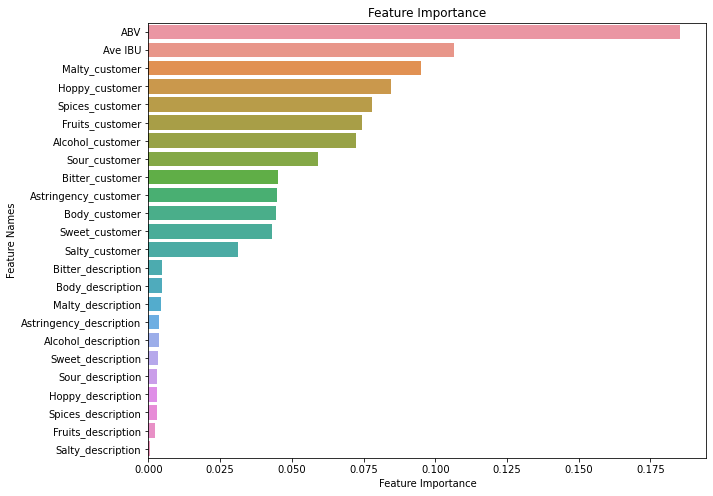

In [72]:
# visualise feature importance
import matplotlib.pyplot as plt
import seaborn as sns
# create dataframe
fi_df = pd.DataFrame(sorted(zip(feature_importances, attributes),reverse=True),columns=['feature_importance','attributes'])
# define size of bar plot
plt.figure(figsize=(10,8))
# plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['attributes'])
# add chart labels
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

Text(0, 0.5, 'rating')

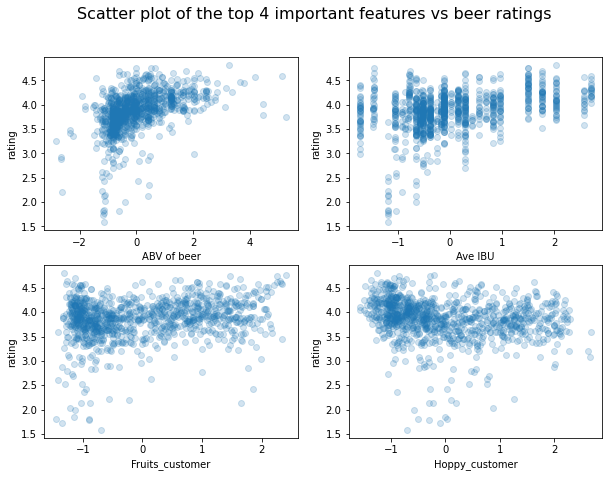

In [73]:
# scatter plot of the top 4 most important features vs the beer ratings
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,7))
fig.suptitle("Scatter plot of the top 4 important features vs beer ratings", fontsize=16)
ax1.scatter(x_test_scaled['ABV'], y_test, alpha=0.2)
ax1.set_xlabel('ABV of beer')
ax1.set_ylabel('rating')
ax2.scatter(x_test_scaled['Ave IBU'], y_test, alpha=0.2)
ax2.set_xlabel('Ave IBU')
ax2.set_ylabel('rating')
ax3.scatter(x_test_scaled['Fruits_customer'], y_test,alpha=0.2)
ax3.set_xlabel('Fruits_customer')
ax3.set_ylabel('rating')
ax4.scatter(x_test_scaled['Hoppy_customer'], y_test,alpha=0.2)
ax4.set_xlabel('Hoppy_customer')
ax4.set_ylabel('rating')

**Analysis and Business Insight:** </br></br>
Overall, we can see that the customer review of the beer tasting profile is more important than the official beer description in predicting the beer rating. The most important feature at predicting the average rating is the alcohol by volume(ABV), followed by the average beer's bitterness (Ave IBU) and malty taste reviewed by the customer (malty_customer). This indicates that the ABV and average IBU of the beer are the top 2 most important factors for a high rating score. 

From the scatter plot, a beer tends to have a higher rating when the ABV is lower. Inversely, consumers tend to provide a high rating for beers with high IBU. Among the tasting profile reviewed by customers, malty, fruity and hoppy are the top 3 features that would affect the beer rating scores. This shows that they are important features for customer when evulating a beer. 

In order to produce a high rating beer, brewers/importers are recommended to offer beers with lower ABV and higher average IBU, and emphasise their maltinese, fruitiness and hoppiness within their marketing campaign.

# Unsupervised learning: PCA + K-means clustering

In [74]:
# load libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [75]:
# load data
df = pd.read_csv("df_clean.csv", index_col = 0)
brewery_key = pd.read_csv("brewery_key.csv", index_col = 0)
style_key = pd.read_csv("style_key.csv", index_col = 0)
name_key = pd.read_csv("name_key.csv", index_col = 0)

print(len(df))

3360


In [76]:
# inspect data
df.head()

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,Body_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,...,0,0,1,0,0,0,0,1,0,1
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,...,1,1,0,0,0,0,0,0,0,1
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,...,1,0,0,0,0,0,0,0,0,0
3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,...,0,1,1,1,1,0,0,0,0,1
4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,...,0,1,1,0,1,0,0,1,0,1


In [77]:
# drop unnecessary columns
df_pca = df.drop(["Description", "Ave Rating",'Astringency_description',
       'Body_description', 'Alcohol_description', 'Bitter_description',
       'Sweet_description', 'Sour_description', 'Salty_description',
       'Fruits_description', 'Hoppy_description', 'Spices_description',
       'Malty_description', 'Min IBU', 'Max IBU', 'ABV'], axis = 1).reset_index(drop=True)
df_pca.head()

,key,Brewery Key,Style Key,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,251,34,8,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,14,37,6,42,43,11,0,10,54,4,62
3,255,1019,8,21,69,10,63,120,14,0,19,36,15,218
4,256,997,8,25,51,26,44,45,9,1,11,51,20,95


In [78]:
# check NaN values
print(df_pca.isna().any())

key                     False
Brewery Key             False
Style Key               False
Astringency_customer    False
Body_customer           False
Alcohol_customer        False
Bitter_customer         False
Sweet_customer          False
Sour_customer           False
Salty_customer          False
Fruits_customer         False
Hoppy_customer          False
Spices_customer         False
Malty_customer          False
dtype: bool


In [79]:
# scale customer review columns to standardise
features = ['Astringency_customer', 'Body_customer',
       'Alcohol_customer', 'Bitter_customer', 'Sweet_customer',
       'Sour_customer', 'Salty_customer', 'Fruits_customer', 'Hoppy_customer',
       'Spices_customer', 'Malty_customer'] # Features related to tasting profile

# scale feature columns
scaler = MinMaxScaler()
# Scale values by row
scaled_profile_feat = pd.DataFrame(scaler.fit_transform(df_pca[features].T).T, columns=features)
# Scale values by column
scaled_profile_feat = pd.DataFrame(scaler.fit_transform(scaled_profile_feat), columns=features)
# append scaled columns back to the dataframe
df_pca[features] = scaled_profile_feat
df_pca

,key,Brewery Key,Style Key,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer,Malty_customer
0,251,34,8,0.117117,0.288288,0.081081,0.423423,0.666667,0.297297,0.0,0.297297,0.513514,0.072072,1.000000
1,252,872,8,0.142857,0.678571,0.214286,0.392857,0.654762,0.190476,0.0,0.285714,0.416667,0.142857,1.000000
2,253,872,8,0.225806,0.596774,0.096774,0.677419,0.693548,0.177419,0.0,0.161290,0.870968,0.064516,1.000000
3,255,1019,8,0.096330,0.316514,0.045872,0.288991,0.550459,0.064220,0.0,0.087156,0.165138,0.068807,1.000000
4,256,997,8,0.255319,0.531915,0.265957,0.457447,0.468085,0.085106,0.0,0.106383,0.531915,0.202128,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,692,755,17,0.077670,0.689320,0.242718,0.456311,1.000000,0.252427,0.0,0.407767,0.271845,0.252427,0.922330
3356,695,1118,17,0.107143,0.221429,0.164286,0.114286,0.385714,0.307143,0.0,0.385714,0.100000,1.000000,0.414286
3357,697,55,17,0.211538,0.701923,0.086538,0.557692,0.836538,0.221154,0.0,0.461538,0.875000,0.423077,1.000000
3358,699,1210,17,0.039062,0.492187,0.226562,0.437500,0.601562,0.109375,0.0,0.210937,0.437500,0.171875,1.000000


In [80]:
# Separating out the features to run PCA
x = df_pca.loc[:, features].values

In [81]:
# fit the standardised data with PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

[0.37799421 0.23239213 0.11972132 0.0906883  0.04645241 0.03765882
 0.03063165 0.02835162 0.01851875 0.01346927 0.00412151]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

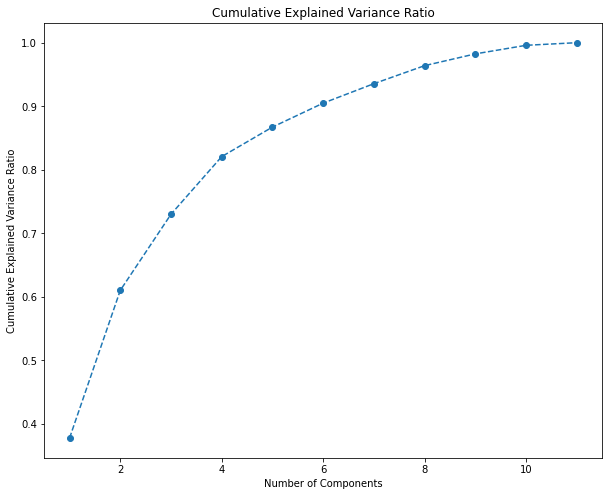

In [82]:
# pick the number of principal components to keep
print(pca.explained_variance_ratio_)

# plot the cumulative explained variance ratio
plt.figure(figsize = (10,8))
plt.plot(range(1, 12), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

In [83]:
# keep 2 components to create a 2D visualisation for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [84]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_.sum())

[0.26673079 0.163987  ]
[0.37799421 0.23239213]
[0.37799421 0.61038634]
0.6103863436648844


In [85]:
finalDf1 = pd.concat([principalDf, df_pca[['Brewery Key', 'key', 'Style Key']]], axis = 1)
finalDf1

,pc1,pc2,Brewery Key,key,Style Key
0,-0.226398,0.079398,34,251,8
1,-0.394875,-0.058436,872,252,8
2,-0.471491,0.474147,872,253,8
3,-0.464342,-0.256686,1019,255,8
4,-0.515950,0.089392,997,256,8
...,...,...,...,...,...
3355,-0.280245,-0.242874,755,692,17
3356,0.165062,-0.582353,1118,695,17
3357,-0.305860,0.319652,55,697,17
3358,-0.450377,-0.031183,1210,699,17


In [86]:
# clustering analysis using K-means
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalDf)
    inertia.append(np.sqrt(kmeans.inertia_))

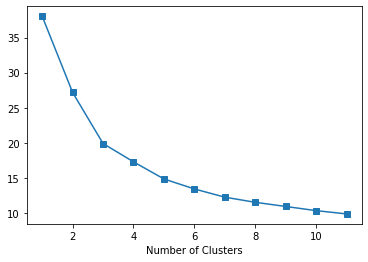

In [87]:
plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('Number of Clusters')
plt.show()

In [88]:
# pick 4 clusters
kmeans_pca = KMeans(n_clusters=4, random_state=1).fit(principalDf)

In [89]:
# combine the clustering results with the PCA result
finalDf1_kmeans=pd.DataFrame(finalDf1).copy()
finalDf1_kmeans["Labels"]=kmeans_pca.labels_
kmeans1_labels = np.unique(finalDf1_kmeans['Labels'])

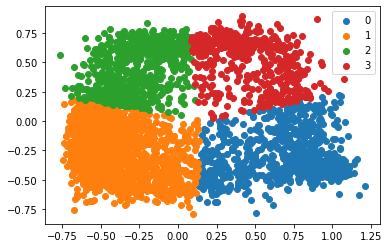

In [90]:
#plotting the results:
for i in kmeans1_labels:
    plt.scatter(finalDf1_kmeans.loc[finalDf1_kmeans['Labels'] == i, 'pc1'] , finalDf1_kmeans.loc[finalDf1_kmeans['Labels'] == i, 'pc2'] , label = i)
plt.legend()
plt.show()

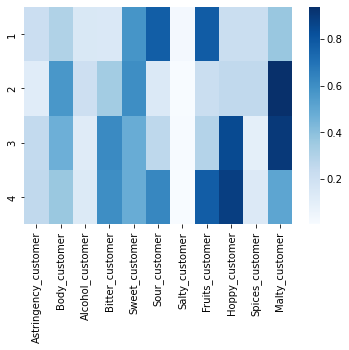

In [91]:
# combine kmeans clustering results with original df (full features info)
x = pd.DataFrame(x, columns=features)
beer_kmeans1_pca=pd.DataFrame(x).copy()
beer_kmeans1_pca["Labels"]=kmeans_pca.labels_

beer_kmeans1_pca=beer_kmeans1_pca.groupby(beer_kmeans1_pca["Labels"]).mean().reset_index()
beer_kmeans1_pca=beer_kmeans1_pca.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(beer_kmeans1_pca,cmap="Blues")
plt.show()

In [92]:
# check beer style vs cluster
# combine kmeans clustering results with original df (full features info)
cluster_style=pd.DataFrame(df_pca).copy()
cluster_style["Labels"]=kmeans_pca.labels_
cluster_style = cluster_style.groupby(["Labels", "Style Key"])['key'].count().reset_index()
cluster_style = pd.merge(cluster_style, style_key, left_on = 'Style Key', right_on = 'Style Key', how = 'left')
cluster_style.rename(columns = {'key':'Count'}, inplace = True)

In [93]:
cluster_style_1 = cluster_style.loc[cluster_style['Labels'] == 0, :].sort_values(['Count'], ascending=False)
cluster_style_1.head(10)

,Labels,Style Key,Count,Style
67,0,126,48,Wild Ale
63,0,122,42,Sour - Berliner Weisse
65,0,124,39,Sour - Flanders Red Ale
64,0,123,37,Sour - Flanders Oud Bruin
66,0,125,37,Sour - Gose
32,0,77,35,Fruit and Field Beer
17,0,45,32,Farmhouse Ale - Saison
60,0,119,32,Lambic - Fruit
61,0,120,30,Lambic - Gueuze
13,0,38,27,IPA - New England


In [94]:
cluster_style_2 = cluster_style.loc[cluster_style['Labels'] == 1, :].sort_values(['Count'], ascending=False)
cluster_style_2.head(10)

,Labels,Style Key,Count,Style
134,1,89,47,Stout - American Imperial
140,1,95,43,Stout - Sweet / Milk
138,1,93,42,Stout - Oatmeal
118,1,71,40,Porter - Imperial
76,1,11,38,Brown Ale - English
139,1,94,38,Stout - Russian Imperial
119,1,72,35,Porter - Robust
120,1,73,34,Porter - Smoked
74,1,9,33,Brown Ale - American
117,1,70,32,Porter - English


In [95]:
cluster_style_3 = cluster_style.loc[cluster_style['Labels'] == 2, :].sort_values(['Count'], ascending=False)
cluster_style_3.head(10)

,Labels,Style Key,Count,Style
187,2,51,34,Red Ale - American Amber / Red
175,2,34,33,IPA - Black / Cascadian Dark Ale
194,2,59,31,Lager - Helles
200,2,65,29,Pilsner - German
179,2,41,28,Bitter - English Extra Special / Strong Bitter (ESB)
190,2,55,25,Lager - American
199,2,64,24,Pilsner - Bohemian / Czech
196,2,61,23,Lager - Kellerbier / Zwickelbier
222,2,101,23,Red Ale - Imperial
211,2,85,19,Rye Beer


In [96]:
cluster_style_4 = cluster_style.loc[cluster_style['Labels'] == 3, :].sort_values(['Count'], ascending=False)
cluster_style_4.head(10)

,Labels,Style Key,Count,Style
243,3,37,44,IPA - Imperial
238,3,32,39,IPA - American
261,3,60,35,Lager - India Pale Lager (IPL)
253,3,48,30,Pale Ale - American
239,3,33,29,IPA - Belgian
241,3,35,23,IPA - Brut
244,3,38,23,IPA - New England
280,3,111,19,Wheat Beer - American Pale
248,3,43,17,Blonde Ale - American
242,3,36,16,IPA - English


Principal component analysis (PCA) has been run before performing k-means clustering to reduce the dimension of the variables so that we can visualise the clusters on a 2D plot. By keeping 2 principal components, 61% of the explained variance can be retained. <br>
We then ran k-means clustering using the 2 principal components, and picked 4 clusters after inspecting the elbow plot. Combining the clustering result with the original variables, we are able to compare it with the customer reviews keywords and understand the characteristics of each cluster:
<br>
- Cluster 1: customers are likely to comment on the sourness, fruitiness and sweetness of the beers in cluster 1, and less on bitterness and hoppiness. If we look at the beer styles of the beers in this cluster, they are mostly sour ales and wheat beers.
- Cluster 2: customers often comment on the maltiness, sweetness and body of beers in cluster 2, and less on sourness, fruitiness and hoppiness. The beer styles within this cluster are mostly stout, porter and brown ale.
- Cluster 3: customers are more likely to comment on the hoppiness, maltiness, and bitterness of beers in cluster 3, and less on sourness and fruitiness. The most common beer styles in this cluster are red ale, lager and pilsner.
- Cluster 4: customers often comment on the hoppiness, fruitiness, sourness, and bitterness, and relatively less on sweetness of the beers in cluster 4. The beer styles in this cluster are mostly IPA and India pale lager (IPL).

**Business Insight:**
There are at least 4 distinct styles of beers in the market with clearly different tasting notes that customers would comment on. From the regression results, we can see that on top of ABV and IBU, the most important variables for beer ratings are customers' comments on maltiness, fruitiness and hoppiness. Combining with the results we get from the PCA and k-means clustering, we can see that beers from cluster 4 are most likely to associate with comments on maltiness, fruitiness and hoppiness. If the beer company would like to launch a beer with a higher rating, they can focus on the beer styles in cluster 4, which are IPAs and IPLs. 


To further our analysis, we can take a look at the key competitors in cluster 4. We can define key competitors in 2 ways: 
1. the breweries that produce the highest number of beers in this cluster;
2. the breweries that achieve that highest average rating in this cluster

In the section below, we have identified the top 5 breweries in the 2 categories. The beer company can perform a more in-depth competitor analysis on these particular breweries to plan out their entrance strategy.

### Key competitor analysis


In [97]:
cluster_brewery = pd.DataFrame(df).copy()
cluster_brewery["Labels"]=kmeans_pca.labels_
cluster_brewery = cluster_brewery.groupby(["Labels", "Brewery Key"]).agg({'key': ['count'], 'Ave Rating': ['mean']}).reset_index()
cluster_brewery = pd.merge(cluster_brewery, brewery_key, left_on = 'Brewery Key', right_on = 'Brewery Key', how = 'left')
cluster_brewery.drop(['Brewery Key'], axis = 1, inplace = True)
cluster_brewery.columns = ['Labels', 'Brewery Key', 'Count', 'Avg Rating', 'Brewery']
# filter only breweries in cluster 4
cluster_brewery_cluster4 = cluster_brewery.loc[cluster_brewery['Labels'] == 3,]

/var/folders/w3/c05dgb3x27z96j4wrkrgvn380000gn/T/ipykernel_30046/377783580.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  cluster_brewery = pd.merge(cluster_brewery, brewery_key, left_on = 'Brewery Key', right_on = 'Brewery Key', how = 'left')


In [98]:
# return the top 5 biggest player in cluster 4
cluster_brewery_cluster4.sort_values('Count', ascending = False).head(5)

,Labels,Brewery Key,Count,Avg Rating,Brewery
1275,3,8,11,4.264545,3 Floyds Brewing Co.
1497,3,1383,11,4.440000,Trillium Brewing Company
1399,3,824,10,4.132000,Lagunitas Brewing Company
1503,3,1428,9,3.978889,Victory Brewing Company - Downingtown
1468,3,1217,9,3.941111,Sierra Nevada Brewing Co.


In [99]:
# return the top 5 player in cluster 4 with highest average rating
cluster_brewery_cluster4.sort_values('Avg Rating', ascending = False).head(5)

,Labels,Brewery Key,Count,Avg Rating,Brewery
1484,3,1310,3,4.613333,The Alchemist
1495,3,1376,1,4.520000,Toppling Goliath Brewing Company
1427,3,987,2,4.455000,New England Brewing Co.
1387,3,727,8,4.441250,Hill Farmstead Brewery
1497,3,1383,11,4.440000,Trillium Brewing Company
